In [32]:
from google.colab import files
uploaded = files.upload()

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
#load the data
data=pd.read_csv('/content/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [35]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [36]:
data.shape

(144, 2)

In [37]:
12*12   #12 years data

144

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [39]:
data['Month']=pd.to_datetime(data['Month']) #coverting month column to date time

In [40]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


<Axes: >

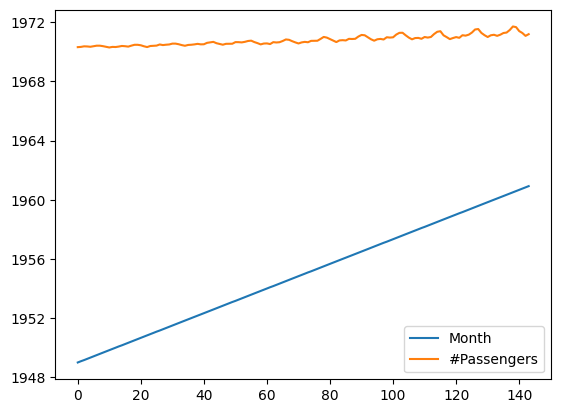

In [42]:
data.plot()

In [43]:
data.index=data['Month']  #making month as index column

In [44]:
data

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


In [45]:
del data['Month']

In [46]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

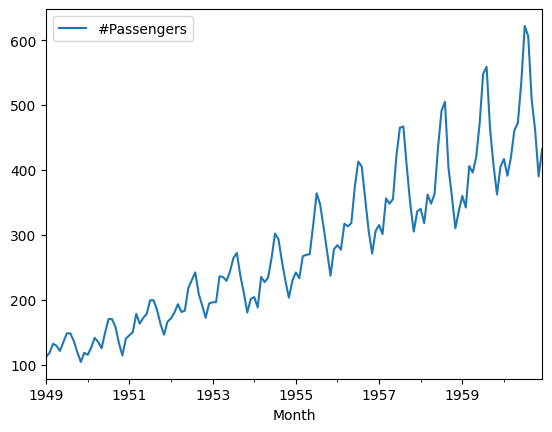

In [47]:
data.plot()

In [48]:
mean_log=data.rolling(window=12).mean()    #rolling window means how many month average you want
std_log=data.rolling(window=12).std()


In [49]:
mean_log

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


Text(0.5, 1.0, 'Rolling mean & statandard deviation')

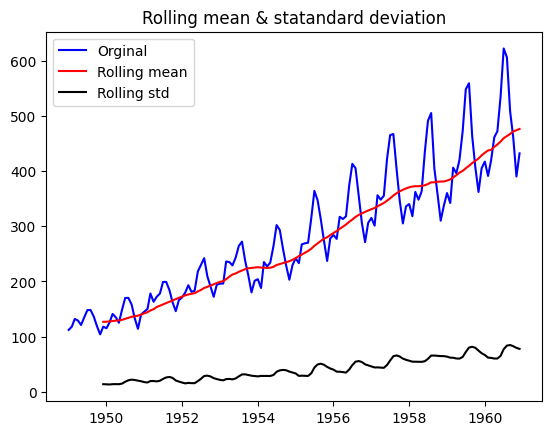

In [50]:
plt.plot(data,color='blue',label='Orginal')
plt.plot(mean_log,color='red',label='Rolling mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean & statandard deviation')

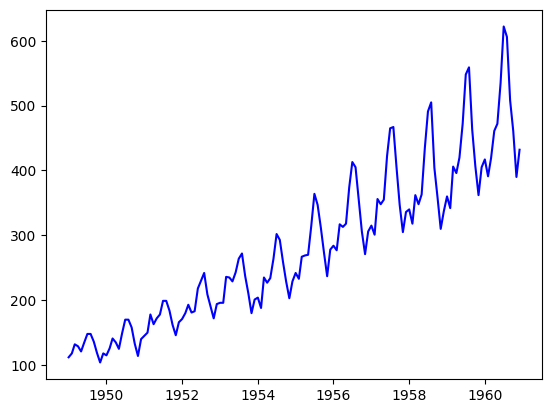

In [51]:
plt.plot(data,color='blue',label='Orginal')

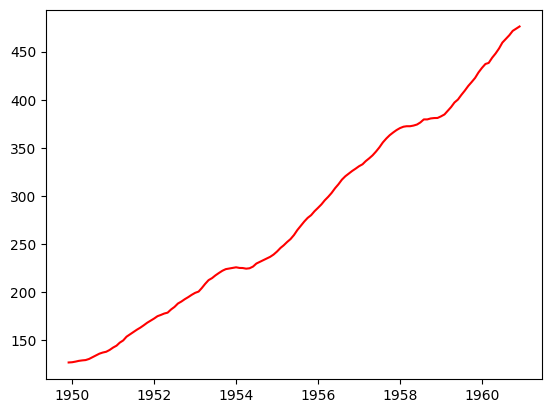

In [52]:
plt.plot(mean_log,color='red',label='Rolling mean')

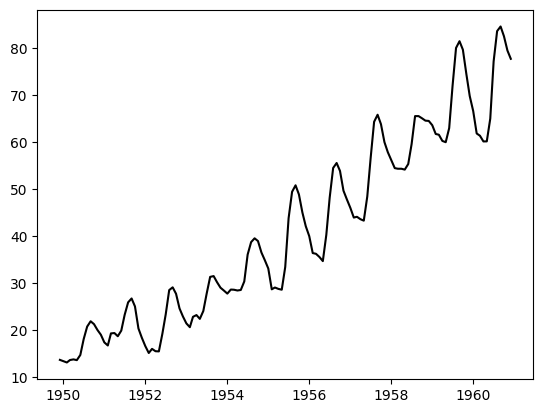

In [53]:
plt.plot(std_log,color='black',label='Rolling std')

In [54]:
#checking the stationarity
from statsmodels.tsa.stattools import adfuller

In [55]:
result=adfuller(data['#Passengers'])
result[1]

0.991880243437641

In [56]:
p_value=result[1]
p_value

0.991880243437641

In [57]:
#refrece
if p_value <=0.05:
  print('stationarity is present')
else:
  print('no stationarity')

no stationarity


<Axes: xlabel='Month'>

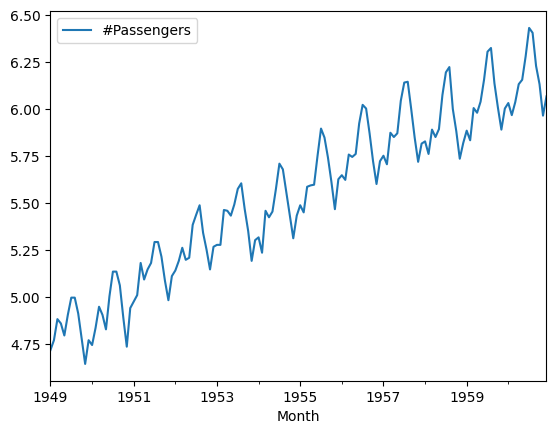

In [58]:
first_log=np.log(data)
first_log=first_log.dropna()
first_log.plot()

Text(0.5, 1.0, 'Rolling mean & statandard deviation')

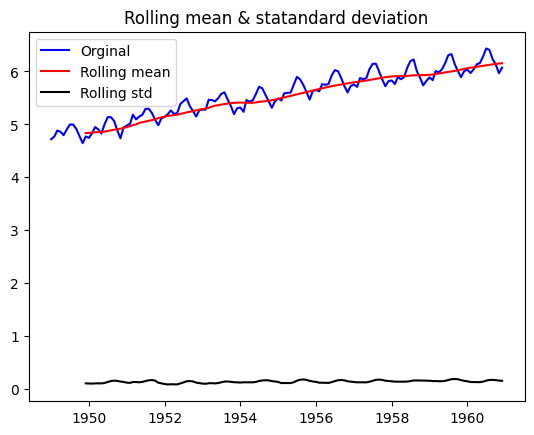

In [65]:
mean_log=first_log.rolling(window=12).mean()    #rolling window means how many month average you want
std_log=first_log.rolling(window=12).std()
plt.plot(first_log,color='blue',label='Orginal')
plt.plot(mean_log,color='red',label='Rolling mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean & statandard deviation')

In [60]:
result=adfuller(first_log['#Passengers'])
result[1]

0.4223667747703874

we use two step

1-convert it into the log and check

2-second step is reduce the

In [63]:
new_data=first_log-mean_log
new_data=new_data.dropna()

In [64]:
result=adfuller(new_data['#Passengers'])
result[1]

0.022234630001242206

Text(0.5, 1.0, 'Rolling mean & statandard deviation')

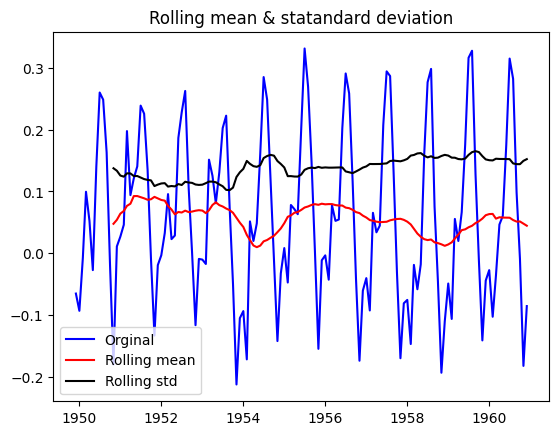

In [66]:
mean_log=new_data.rolling(window=12).mean()    #rolling window means how many month average you want
std_log=new_data.rolling(window=12).std()
plt.plot(new_data,color='blue',label='Orginal')
plt.plot(mean_log,color='red',label='Rolling mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean & statandard deviation')

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

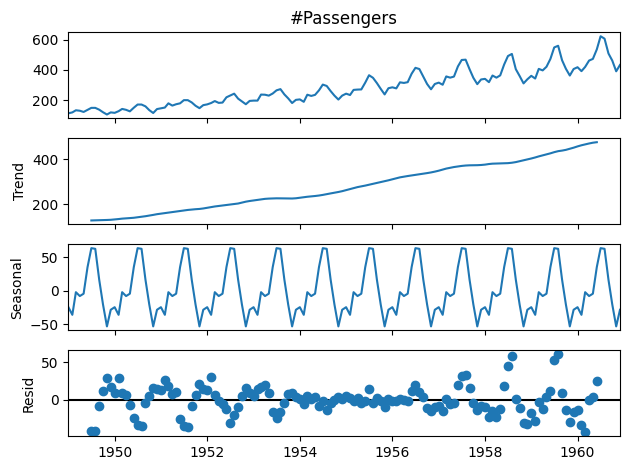

In [69]:
old_decompose=seasonal_decompose(data['#Passengers'].dropna())
old_decompose.plot();

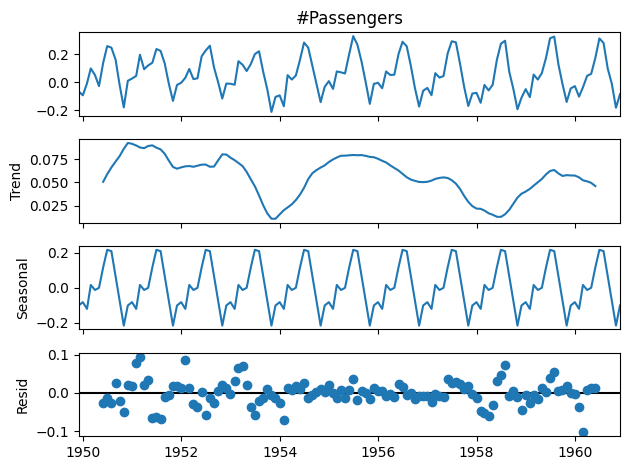

In [70]:
old_decompose=seasonal_decompose(new_data['#Passengers'].dropna())
old_decompose.plot();

In [ ]:
#ARIMA---AR+I+MA
#pdq
#p-autoregressive(AR)
#d-defferencing(I)
#q-moving average(MA)

In [71]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.2 MB/s eta 0:00:00


In [72]:
from pmdarima import auto_arima

In [74]:
arima_model=auto_arima(data['#Passengers'],seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

In [76]:
arima_model=auto_arima(new_data['#Passengers'],seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-277.439, Time=2.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-152.169, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-233.989, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-246.526, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-133.698, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-252.154, Time=0.56 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-279.238, Time=1.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-254.090, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-260.142, Time=0.30 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-277.308, Time=1.27 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-261.472, Time=0.34 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-285.263, Time=1.52 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-283.078, Time=1.58 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-267.800, Time=2.31 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept

In [77]:
from statsmodels.tsa.arima.model import ARIMA

In [79]:
144*8

1152

In [80]:
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [78]:
train=new_data.iloc[:120]['#Passengers']
test=new_data.iloc[121:]['#Passengers']
model=ARIMA(train,order=(3,0,2))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 134.726
Date:                Sun, 26 May 2024   AIC                           -255.453
Time:                        17:16:56   BIC                           -235.940
Sample:                    12-01-1949   HQIC                          -247.529
                         - 11-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0563      0.006      8.958      0.000       0.044       0.069
ar.L1          0.7851      0.151      5.199      0.000       0.489       1.081
ar.L2          0.2854      0.186      1.531      0.126      -0.080       0.651
ar.L3         -0.5319      0.120     -4.440      0.000      -0.767      -0.297
ma.L1          0.1278      0.122      1.043      0.297      -0.112       0.368
ma.L2         -0.7497      0.093     -8.051      0.000      -0.932      -0.567
sigma2         0.0061      0.001      5.414      0.000       0.004       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                 3.85
Prob(Q):                              0.53   Prob(JB):                         0.15
Heteroskedasticity (H):               0.98   Skew:                             0.11
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
train

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
                ...   
1959-07-01    0.316430
1959-08-01    0.327838
1959-09-01    0.128057
1959-10-01   -0.011315
1959-11-01   -0.141406
Name: #Passengers, Length: 120, dtype: float64

<Axes: xlabel='Month'>

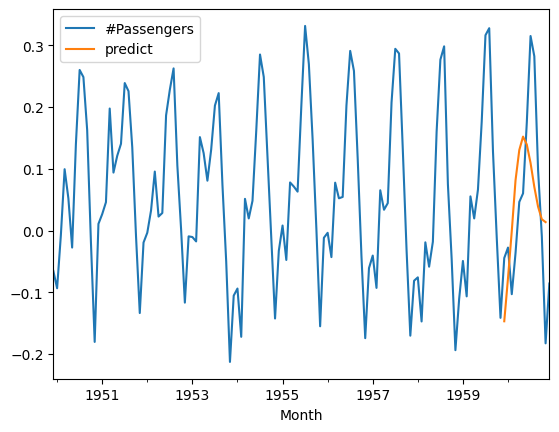

In [81]:
new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

In [96]:
model=SARIMAX(train,order=(3,0,2),seasonal_order=(3,0,2,6))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Convergenc

<Axes: xlabel='Month'>

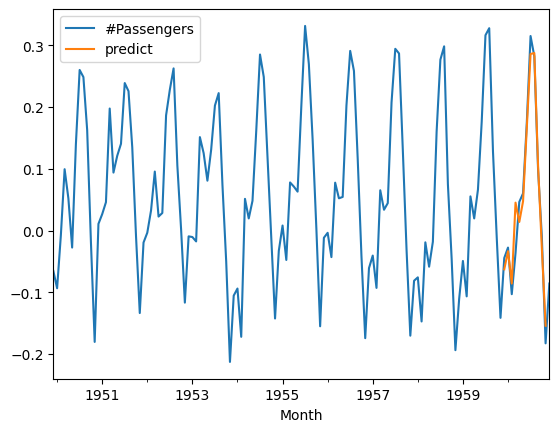

In [97]:
new_data['predict']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

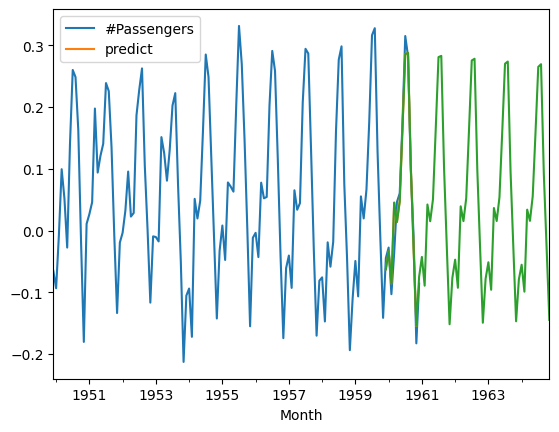

In [98]:
forecast=model.forecast(steps=60)
new_data.plot()
forecast.plot()